# Inicializando o dataset


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import combinations, product

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb_top_1000.csv')
df.head(100)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,https://m.media-amazon.com/images/M/MV5BNDg4Nj...,Amélie,2001,U,122 min,"Comedy, Romance",8.3,Amélie is an innocent and naive girl in Paris ...,69.0,Jean-Pierre Jeunet,Audrey Tautou,Mathieu Kassovitz,Rufus,Lorella Cravotta,703810,"33,225,499"
96,https://m.media-amazon.com/images/M/MV5BMTA2ND...,Snatch,2000,UA,104 min,"Comedy, Crime",8.3,"Unscrupulous boxing promoters, violent bookmak...",55.0,Guy Ritchie,Jason Statham,Brad Pitt,Benicio Del Toro,Dennis Farina,782001,"30,328,156"
97,https://m.media-amazon.com/images/M/MV5BOTdiNz...,Requiem for a Dream,2000,A,102 min,Drama,8.3,The drug-induced utopias of four Coney Island ...,68.0,Darren Aronofsky,Ellen Burstyn,Jared Leto,Jennifer Connelly,Marlon Wayans,766870,"3,635,482"
98,https://m.media-amazon.com/images/M/MV5BNTBmZW...,American Beauty,1999,UA,122 min,Drama,8.3,A sexually frustrated suburban father has a mi...,84.0,Sam Mendes,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,1069738,"130,096,601"


# Entendendo o dataset

In [10]:
df.shape

(1000, 16)

In [11]:
df.isna().any()

,0
Poster_Link,False
Series_Title,False
Released_Year,False
Certificate,True
Runtime,False
Genre,False
IMDB_Rating,False
Overview,False
Meta_score,True
Director,False


In [12]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [13]:
df.head(5)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Limpando o dataset

In [14]:
# formatando as colunas numéricas
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df['Runtime'] = pd.to_numeric(df['Runtime'].str.replace('min', ''), errors='coerce')
df['Gross'] = pd.to_numeric(df['Gross'].str.replace(',', ''), errors='coerce')
pd.options.display.float_format = '{:.2f}'.format


In [15]:
# Retirando as colunas que não serão utilizadas
df = df.drop(columns=['Poster_Link', 'Overview', 'Certificate'])
df.loc[966, 'Released_Year'] = 1995

''' Substituindo os vazios pela média '''
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In [16]:
# Criando colunas complementares para a análise
df['Score_diff'] = abs(df['IMDB_Rating'] * 10 - df['Meta_score'])
df['Avarage_score'] = (df['IMDB_Rating'] * 10 + df['Meta_score']) / 2

In [17]:
df.head(967)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Score_diff,Avarage_score
0,The Shawshank Redemption,1994.00,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00,13.00,86.50
1,The Godfather,1972.00,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,8.00,96.00
2,The Dark Knight,2008.00,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,6.00,87.00
3,The Godfather: Part II,1974.00,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00,0.00,90.00
4,12 Angry Men,1957.00,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00,6.00,93.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,Sense and Sensibility,1995.00,136,"Drama, Romance",7.60,84.00,Ang Lee,Emma Thompson,Kate Winslet,James Fleet,Tom Wilkinson,102598,43182776.00,8.00,80.00
963,Die Hard: With a Vengeance,1995.00,128,"Action, Adventure, Thriller",7.60,58.00,John McTiernan,Bruce Willis,Jeremy Irons,Samuel L. Jackson,Graham Greene,364420,100012499.00,18.00,67.00
964,Dead Man,1995.00,121,"Adventure, Drama, Fantasy",7.60,62.00,Jim Jarmusch,Johnny Depp,Gary Farmer,Crispin Glover,Lance Henriksen,90442,1037847.00,14.00,69.00
965,The Bridges of Madison County,1995.00,135,"Drama, Romance",7.60,69.00,Clint Eastwood,Clint Eastwood,Meryl Streep,Annie Corley,Victor Slezak,73172,71516617.00,7.00,72.50


In [18]:
df.isna().any()

,0
Series_Title,False
Released_Year,False
Runtime,False
Genre,False
IMDB_Rating,False
Meta_score,False
Director,False
Star1,False
Star2,False
Star3,False


In [19]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Score_diff,Avarage_score
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,1991.22,122.89,7.95,77.97,273692.91,68034750.87,8.41,78.73
std,23.29,28.09,0.28,11.36,327372.70,100037078.93,7.23,6.18
min,1920.00,45.00,7.60,28.00,25088.00,1305.00,0.00,52.50
25%,1976.00,103.00,7.70,72.00,55526.25,5012919.25,3.00,75.50
50%,1999.00,119.00,7.90,77.97,138548.50,42389449.00,6.00,79.00
75%,2009.00,137.00,8.10,85.25,374161.25,68034750.87,12.00,82.50
max,2020.00,321.00,9.30,100.00,2343110.00,936662225.00,49.00,96.00


# Analisando o Dataset


## Análises com o gênero do filme



In [20]:
import re

# Separa os gêneros em listas e "explode" para obter cada gênero em uma linha separada
all_genres = df['Genre'].str.split(',').explode().str.strip()

# Obtém uma lista de gêneros únicos
unique_genres = all_genres.unique()

# Lista com a quantidade de cada gênero
genre_counts = all_genres.value_counts()
genre_counts = genre_counts.sort_values(ascending=True)

# Cria uma cópia do Dataframe original
df_copy= df.copy()

# Separa os gêneros únicos para permitir uma análise de cada um deles
# isso porque cada linha da coluna "genre" contém mais de um gênero
df_copy['Genre'] = df_copy['Genre'].str.split(',')
df_exp = df_copy.explode("Genre")
df_exp['Genre'] = df_exp['Genre'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

# Esse bloco de código cria uma tabela com arrecadação média por gênero
gross_p_genre = df_exp.groupby('Genre')['Gross'].mean().reset_index()
gross_p_genre = gross_p_genre.sort_values(by='Gross', ascending=True)


# Esse bloco de código cria uma tabela com duração média por gênero
runtime_p_genre = df_exp.groupby(['Series_Title', 'Genre'])['Runtime'].mean().reset_index().groupby('Genre')['Runtime'].mean().reset_index()
runtime_p_genre = runtime_p_genre.sort_values(by='Runtime', ascending=True)

# Esse bloco de código cria uma tabela com ano mais comum de lançamento por gênero
year_p_genre = df_exp.groupby('Genre')['Released_Year'].agg(lambda x: x.mode()[0]).reset_index()
year_p_genre = year_p_genre.sort_values(by='Released_Year', ascending=True)

year_p_genre_M = df_exp.groupby('Genre')['Released_Year'].mean().reset_index()
year_p_genre_M = year_p_genre_M.sort_values(by='Released_Year', ascending=True)

# Lista com a quantidade de cada gênero
genre_counts = all_genres.value_counts()
genre_counts = genre_counts.sort_values(ascending=True)





### Plotando gráficos

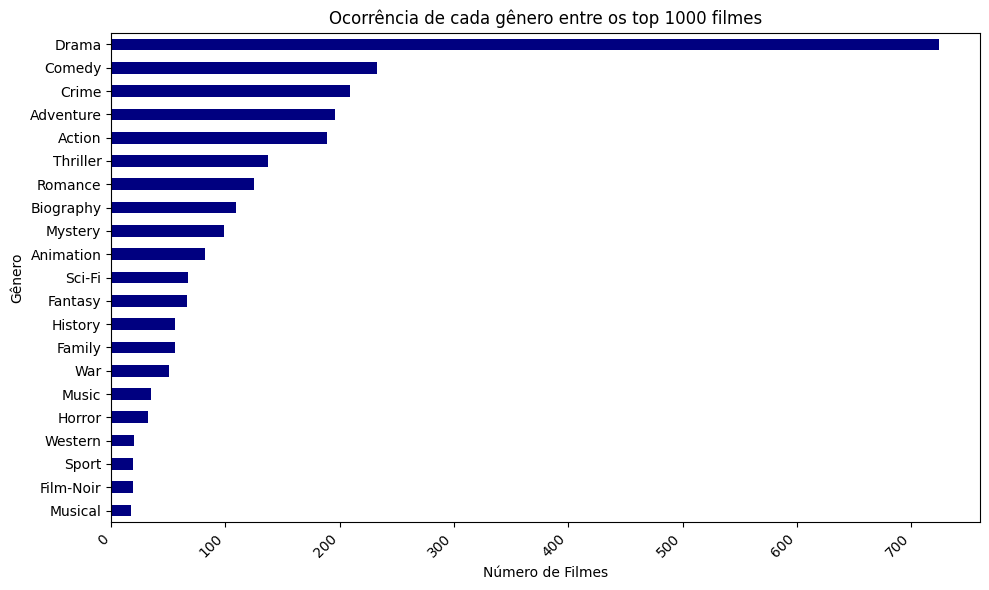

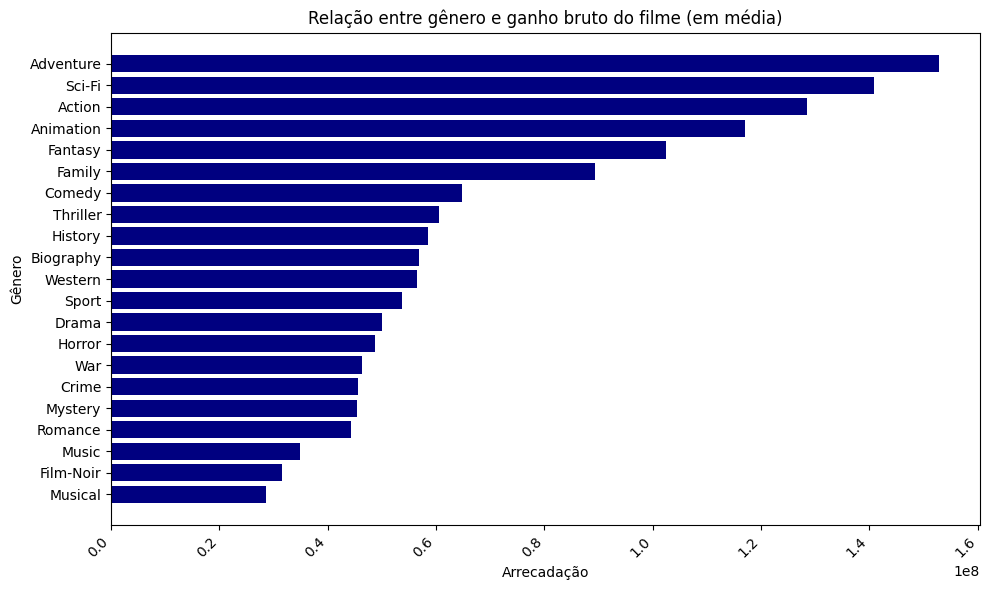

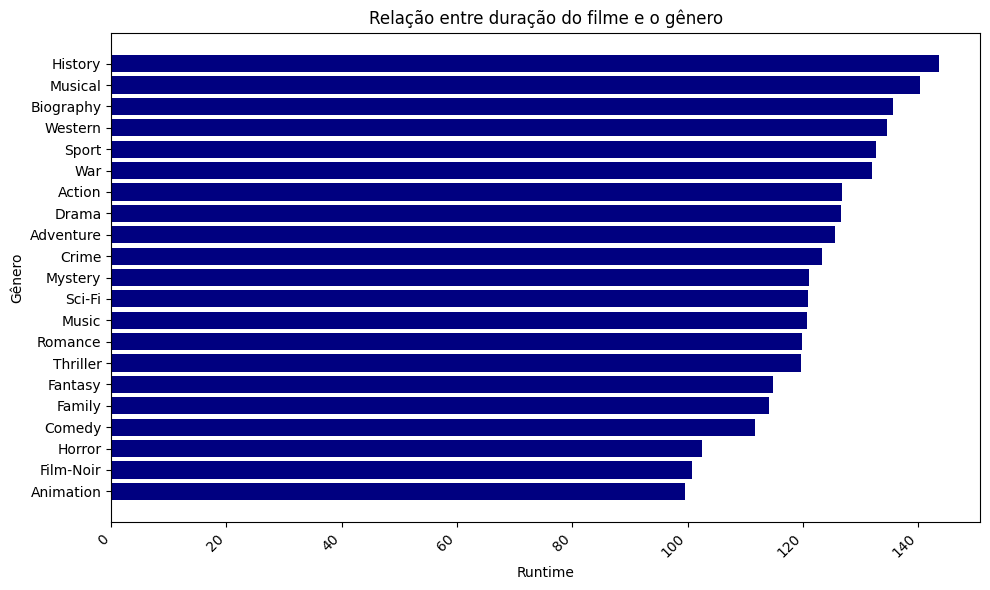

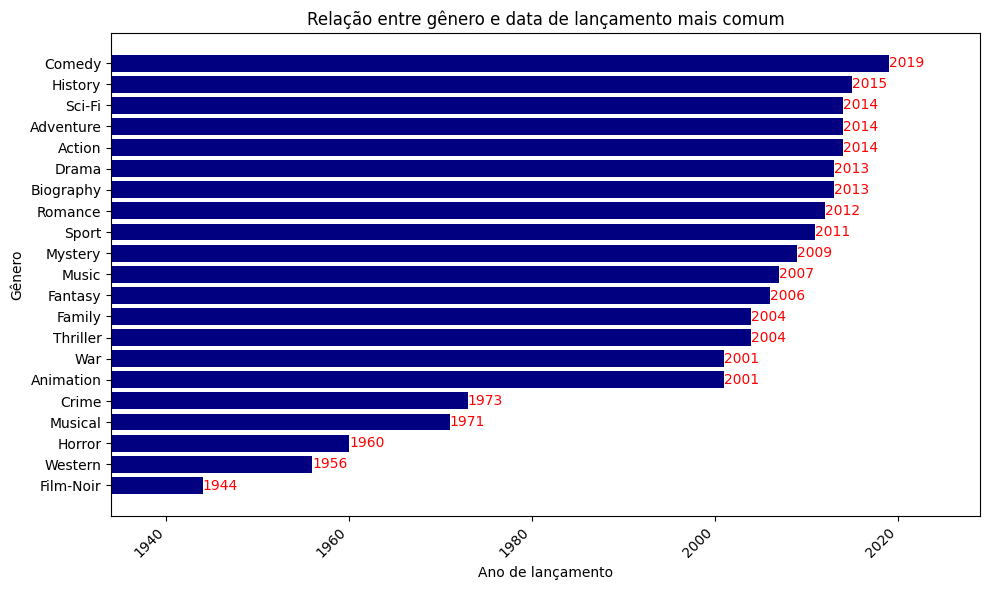

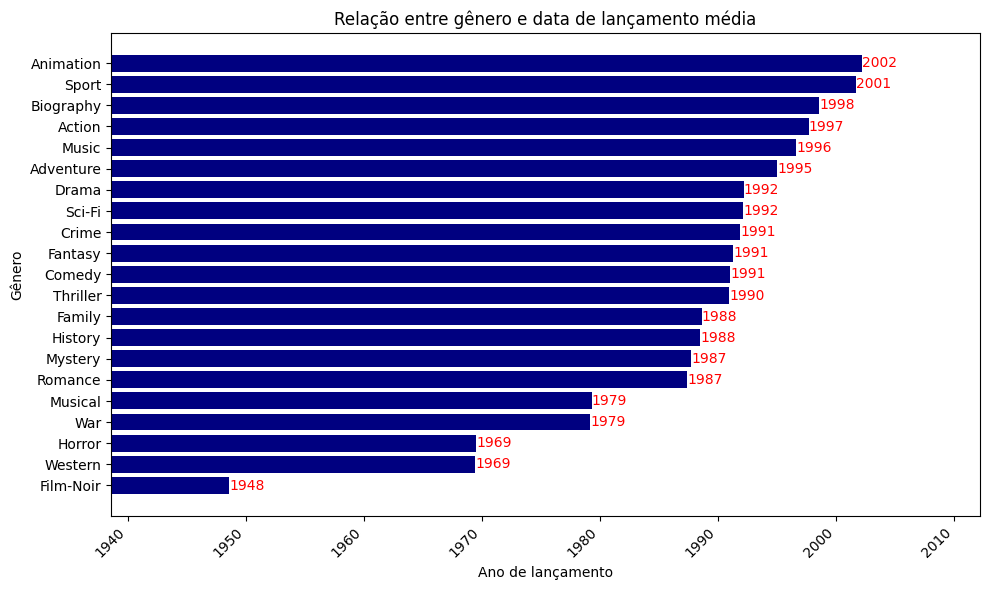

In [21]:
# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='navy')
plt.ylabel('Gênero')
plt.xlabel('Número de Filmes')
plt.title('Ocorrência de cada gênero entre os top 1000 filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Gráfico Gênero x Ganho bruto
plt.figure(figsize=(10, 6))
plt.barh(gross_p_genre['Genre'], gross_p_genre['Gross'], color='navy')
plt.ylabel('Gênero')
plt.xlabel('Arrecadação')
plt.title('Relação entre gênero e ganho bruto do filme (em média)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico Gênero X Duração
plt.figure(figsize=(10, 6))
plt.barh(runtime_p_genre['Genre'], runtime_p_genre['Runtime'], color='navy')
plt.ylabel('Gênero')
plt.xlabel('Runtime')
plt.title('Relação entre duração do filme e o gênero')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico Ano de lançamento (mais comum) x Gênero
plt.figure(figsize=(10, 6))
bars = plt.barh(year_p_genre['Genre'], year_p_genre['Released_Year'], color='navy')
plt.ylabel('Gênero')
plt.xlabel('Ano de lançamento')
plt.title('Relação entre gênero e data de lançamento mais comum')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando os valores do ano dentro das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', ha='left', va='center', color='red')
# Ajustando o eixo do Ano de Lançamento
plt.xlim(year_p_genre['Released_Year'].min() - 10, year_p_genre['Released_Year'].max() + 10)
plt.show()

# Gráfico Ano de lançamento (médio) x Gênero
plt.figure(figsize=(10, 6))
bars = plt.barh(year_p_genre_M['Genre'], year_p_genre_M['Released_Year'], color='navy')
plt.ylabel('Gênero')
plt.xlabel('Ano de lançamento')
plt.title('Relação entre gênero e data de lançamento média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adicionando os valores do ano dentro das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', ha='left', va='center', color='red')

# Ajustando o eixo do Ano de Lançamento
plt.xlim(year_p_genre_M['Released_Year'].min() - 10, year_p_genre_M['Released_Year'].max() + 10)

plt.show()

## Análises com Gross


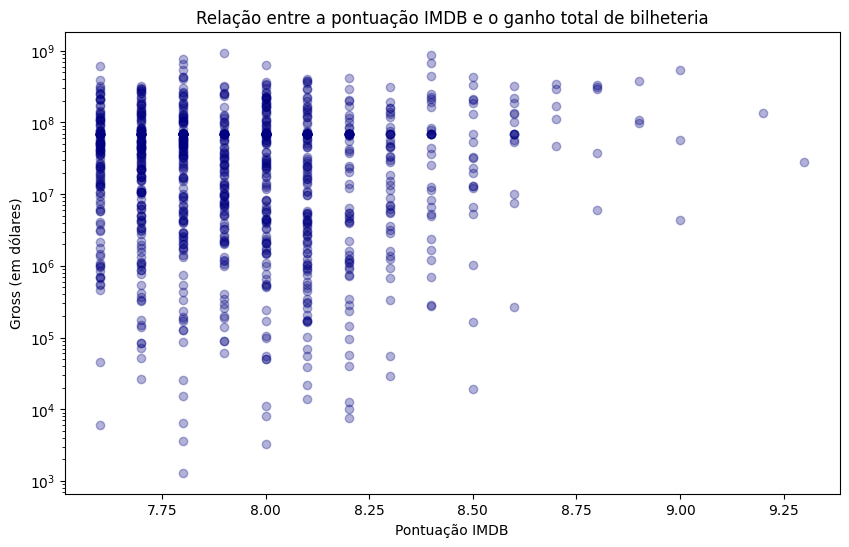

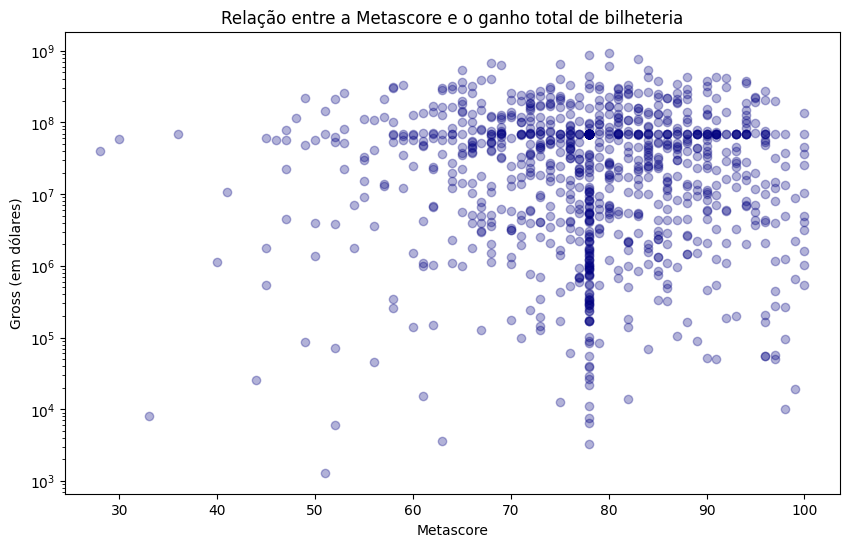

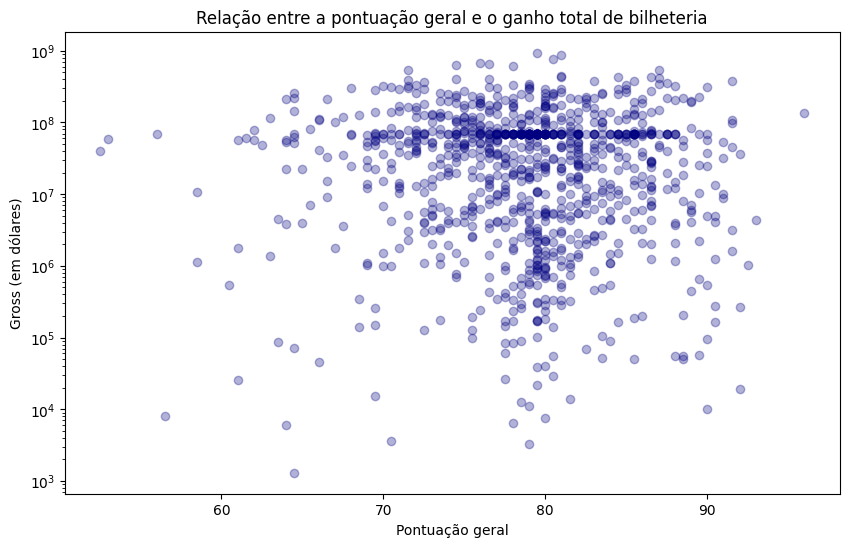

In [22]:
import matplotlib.pyplot as plt


# IMDB rating
# Configuração do gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df['IMDB_Rating'], df['Gross'], color='navy', alpha=0.3)

# Rótulos e título do gráfico
plt.xlabel('Pontuação IMDB')
plt.ylabel('Gross (em dólares)')
plt.title('Relação entre a pontuação IMDB e o ganho total de bilheteria')
plt.yscale('log')  # Escala logarítmica, opcional, para valores de Gross muito altos
plt.show()

# Metascore
plt.figure(figsize=(10, 6))
plt.scatter(df['Meta_score'], df['Gross'], color='navy', alpha=0.3)
plt.xlabel('Metascore')
plt.ylabel('Gross (em dólares)')
plt.title('Relação entre a Metascore e o ganho total de bilheteria')
plt.yscale('log')  # Escala logarítmica, opcional, para valores de Gross muito altos
plt.show()

# Pontuação geral
plt.figure(figsize=(10, 6))
plt.scatter(df['Avarage_score'], df['Gross'], color='navy', alpha=0.3)
plt.xlabel('Pontuação geral')
plt.ylabel('Gross (em dólares)')
plt.title('Relação entre a pontuação geral e o ganho total de bilheteria')
plt.yscale('log')  # Escala logarítmica, opcional, para valores de Gross muito altos
plt.show()


## Atores e diretores

In [23]:
# Gera todas as combinações de 3 atores para cada filme e conta a frequência de cada trio
trios = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda row: [tuple(sorted(trio)) for trio in combinations(row, 3)], axis=1).explode().value_counts()

# Gera todas as combinações de 2 atores para cada filme e conta a frequência de cada dupla
duplas = df[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda row: [tuple(sorted(par)) for par in combinations(row, 2)], axis=1).explode().value_counts()

# Gera uma lista com todos os atores e conta a frequência deles
atores = pd.concat([df['Star1'], df['Star2'], df['Star3'], df['Star4']]).value_counts()

diretores = df['Director'].value_counts()

# Cria todas as combinações diretor-ator para cada filme
cs_diretor_ator = df.apply(lambda row: [(row['Director'], ator) for ator in [row['Star1'], row['Star2'], row['Star3'], row['Star4']]], axis=1)
cs_diretor_ator = cs_diretor_ator.explode().value_counts()
cs_diretor_ator.head(5)

,count
"(Akira Kurosawa, Toshirô Mifune)",7
"(Joel Coen, Ethan Coen)",6
"(Charles Chaplin, Charles Chaplin)",6
"(Martin Scorsese, Robert De Niro)",6
"(Woody Allen, Woody Allen)",5


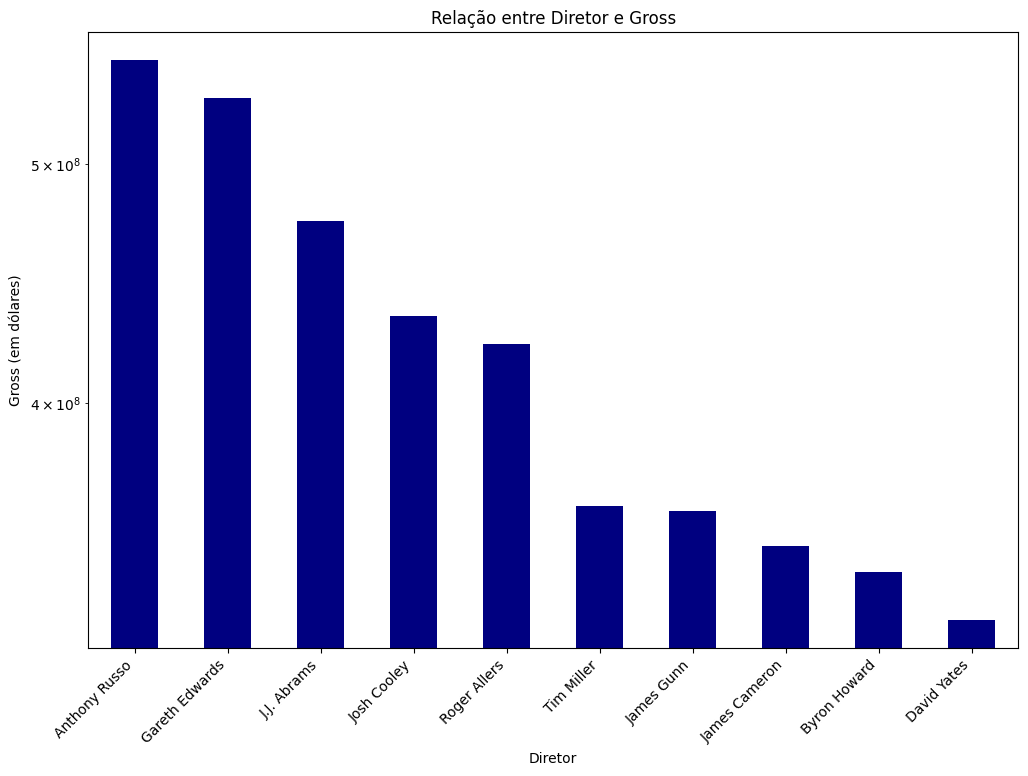

In [24]:
# Agrupa os dados por diretor e soma o Gross
director_gross = df.groupby('Director')['Gross'].mean().sort_values(ascending=False)

# Cria o gráfico de barras horizontais
plt.figure(figsize=(12, 8))
director_gross.head(10).plot(kind='bar', color='navy')

# Define os rótulos dos eixos e o título do gráfico
plt.ylabel('Gross (em dólares)')
plt.xlabel('Diretor')
plt.title('Relação entre Diretor e Gross')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
# Exibe o gráfico
plt.show()

## Análises com Ano de lançamento



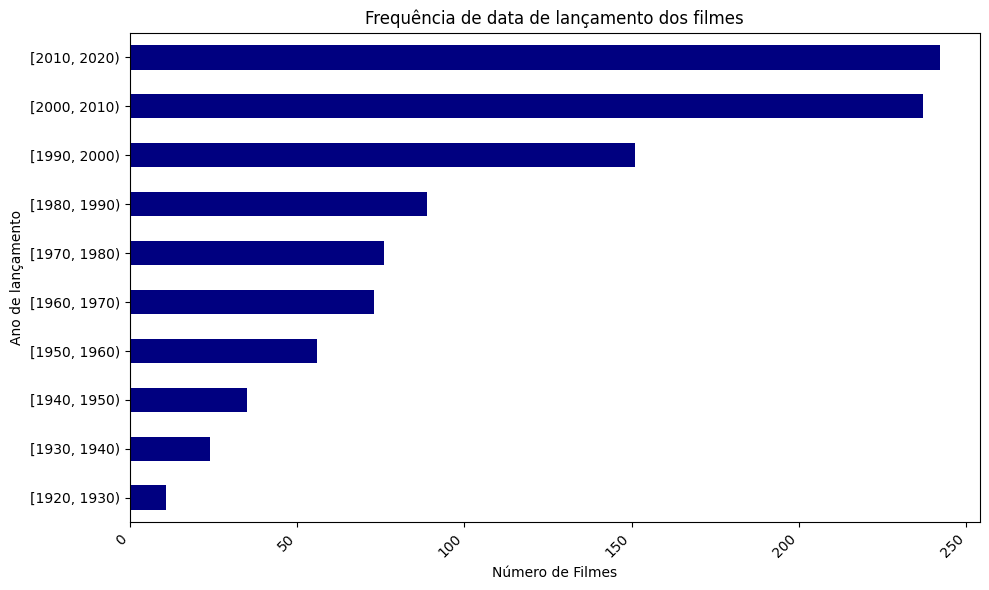

In [25]:
# Cria intervalos de 10 anos, começando em 1920 e indo até 2030
bins = range(1920, 2030, 10)

# Cria labels como '1920s', '1930s', etc.
# labels = [f'{str(year)[:-1]}0s' for year in bins[:-1]]

# Lista com a quantidade de cada ano
year_counts = pd.cut(df['Released_Year'], bins=bins, include_lowest=True, right=False).value_counts()
year_counts = year_counts.sort_index() #Ordena a lista

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
year_counts.plot(kind='barh', color='navy')
plt.ylabel('Ano de lançamento')
plt.xlabel('Número de Filmes')
plt.title('Frequência de data de lançamento dos filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

